In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv('AirPassengers.csv')
dataset = dataset['#Passengers']
dataset = np.array(dataset).reshape(-1,1)
dataset[:10]

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119]], dtype=int64)

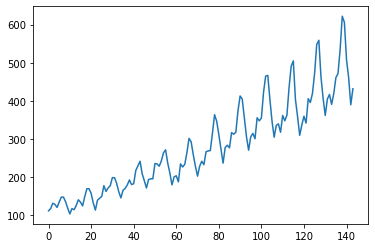

In [3]:
plt.plot(dataset)

In [4]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset.min(),dataset.max()

(0.0, 1.0)

We are going to use the data of first 100 months as training data and the last 44 months as testing data.

In [5]:
train_size = 100
test_size = 44
train = dataset[0:train_size, :]
train.shape

(100, 1)

In [6]:
test = dataset[train_size:144, :]
test.shape

(44, 1)

Create training and testing dataset
We are going to predict the (i)th value in the dataset on the basis of (i-1)th value. That means we are going to look back by 1 to predict the next value. Hence we are creating a function get_data() to create dataX and dataY for the training as well as the testing data.

In [7]:
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
X_train, y_train = get_data(train, look_back)
X_train[:10]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

In [8]:
y_train[:10]

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ])

In [9]:
X_test, y_test = get_data(test, look_back)

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [11]:
X_train.shape

(98, 1, 1)

In [12]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
98/98 [==============================] - 0s 849us/step - loss: 0.0421
Epoch 2/50
98/98 [==============================] - 0s 808us/step - loss: 0.0202
Epoch 3/50
98/98 [==============================] - 0s 942us/step - loss: 0.0143
Epoch 4/50
98/98 [==============================] - 0s 762us/step - loss: 0.0127
Epoch 5/50
98/98 [==============================] - 0s 806us/step - loss: 0.0117
Epoch 6/50
98/98 [==============================] - 0s 828us/step - loss: 0.0109
Epoch 7/50
98/98 [==============================] - 0s 811us/step - loss: 0.0096
Epoch 8/50
98/98 [==============================] - 0s 773us/step - loss: 0.0086
Epoch 9/50
98/98 [==============================] - 0s 802us/step - loss: 0.0077
Epoch 10/50
98/98 [==============================] - 0s 843us/step - loss: 0.0066
Epoch 11/50
98/98 [==============================] - 0s 797us/step - loss: 0.0059
Epoch 12/50
98/98 [==============================] - 0s 793us/step - loss: 0.0050
Epoch 13/50
98/98 [======

In [15]:
y_pred = model.predict(X_test)

In [16]:
scaler.scale_

array([0.0019305])

In [17]:
y_pred = scaler.inverse_transform(y_pred)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

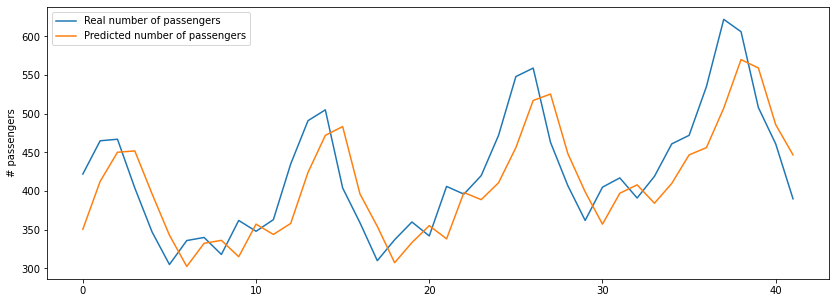

In [18]:
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real number of passengers')
plt.plot(y_pred, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()


As we can see that the actual results and the predicted results are following the same trend. Our model is predicting the number of passengers with a good accuracy.